In [2]:
from ast import literal_eval

import numpy as np
import corner

import matplotlib.pyplot as plt
pltparams = {"axes.grid": False,
        "text.usetex" : False,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(pltparams)

default_corner_kwargs = dict(bins=40, 
                        smooth=True, 
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        quantiles=[],
                        levels=[0.68, 0.95],
                        plot_density=False, 
                        plot_datapoints=False, 
                        fill_contours=False,
                        max_n_ticks=4, 
                        min_n_ticks=3,
                        save=False,
                        truth_color="red")

import pandas as pd



## Time-dependent systematic uncertainty

Load the data

In [3]:
posterior_pbag = np.load("./pbag/results_production.npz")["chains"].reshape(-1, 21)
posterior_afgpy = np.load("./afgpy/results_production.npz")["chains"].reshape(-1, 20)

Make corner plot

In [9]:
var_names = ["inclination_EM", "log10_E0", "thetaCore", "alphaWing", "log10_n0", "p", "log10_epsilon_e", "log10_epsilon_B"]

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif


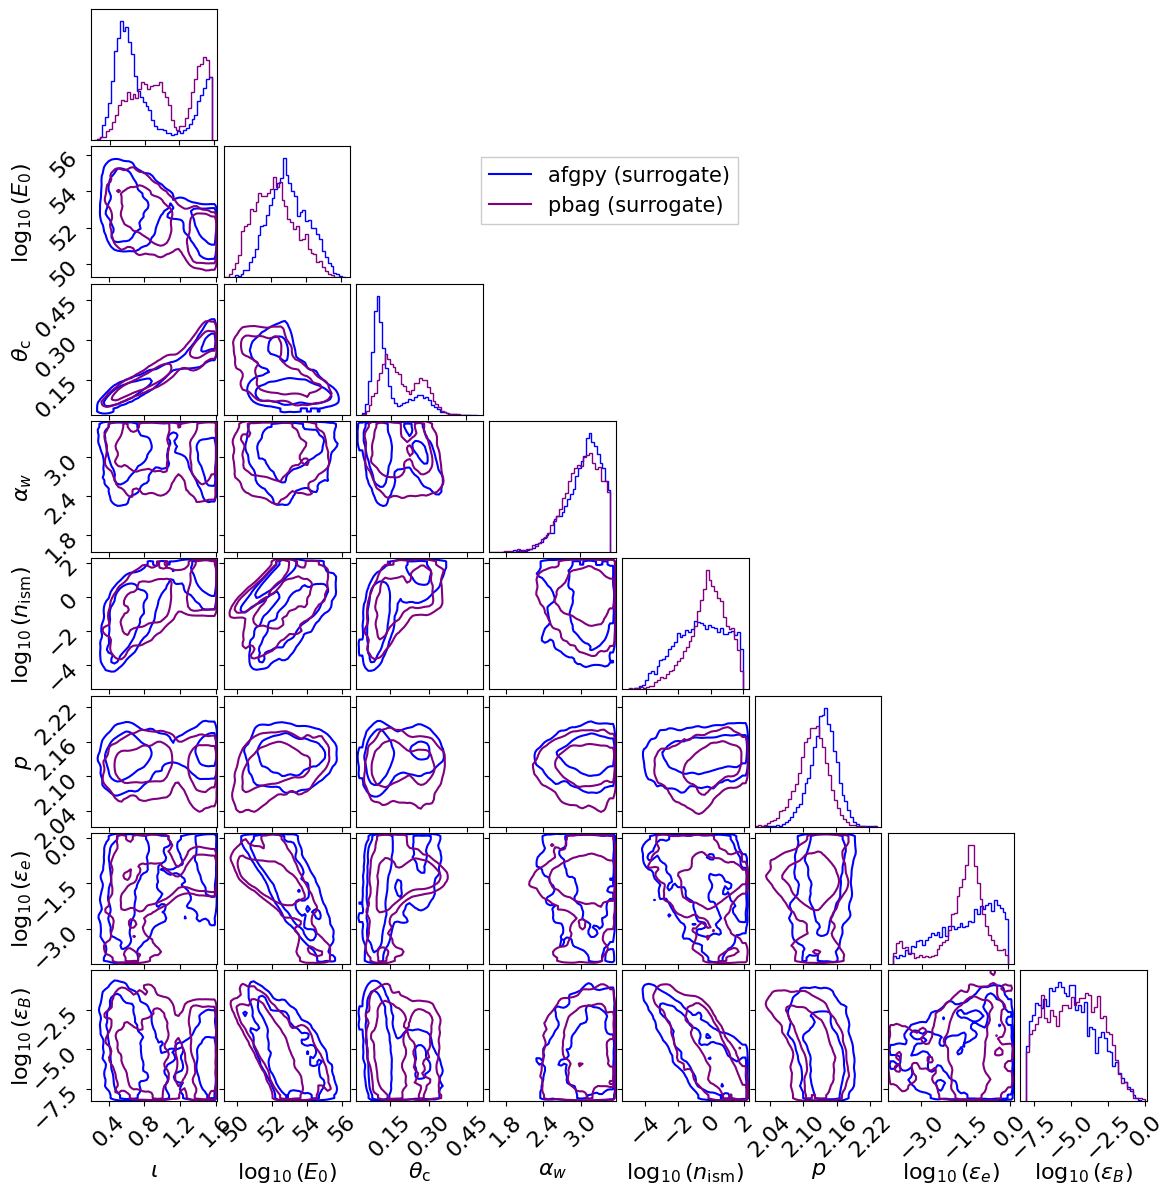

In [10]:
fig, ax = plt.subplots(8,8, figsize = (12, 12))

corner.corner(posterior_afgpy[:,:8], 
              fig=fig,
              color = "blue",
              labelpad = 0.15,
              labels =  ["$\\iota$", "$\log_{10}(E_0)$", "$\\theta_{\\mathrm{c}}$", "$\\alpha_w$", "$\log_{10}(n_{\mathrm{ism}})$", "$p$", "$\log_{10}(\\epsilon_e)$", "$\log_{10}(\\epsilon_B)$"],
              **default_corner_kwargs,
              hist_kwargs=dict(density=True))

corner.corner(posterior_pbag[:,:8],
              fig=fig,
              color="purple",
              **default_corner_kwargs,
              hist_kwargs=dict(density=True))

handles = []
for c in ["blue", "purple"]:
    handle = plt.plot([],[], color=c)[0]
    handles.append(handle)

ax[1, 4].legend(handles=handles, labels=["afgpy (surrogate)", "pbag (surrogate)"], fontsize=15, fancybox=False, framealpha=1)
fig.subplots_adjust(left=0.08, bottom=0.08, right=0.96, top=0.99)
plt.show()

(array([0.00053149, 0.00089208, 0.00106693, 0.00116834, 0.00125041,
        0.00128069, 0.0012857 , 0.0013983 , 0.00136311, 0.00093906]),
 array([105.15859985, 194.63517761, 284.11175537, 373.58831787,
        463.06488037, 552.54144287, 642.01800537, 731.49462891,
        820.97119141, 910.44775391, 999.92431641]),
 <BarContainer object of 10 artists>)

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Serif
findfont: Generic family 'serif' not found because none of the following

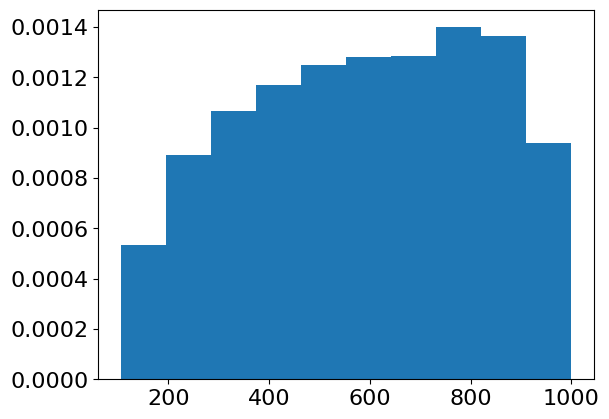

In [4]:
plt.hist(posterior_pbag[:, 8], density=True)